<a href="https://colab.research.google.com/github/rohan-dot/Rossmann-Sales-/blob/main/Rohan_Datta_Purkayastha_Team_4_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 1/Capstone Project 2/Data & Resources/Rossmann Stores Data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 1/Capstone Project 2/Data & Resources/store.csv')

In [ ]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df1.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [ ]:
df1.shape

(1017209, 9)

In [ ]:
df2.shape

(1115, 10)

In [ ]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# EDA

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


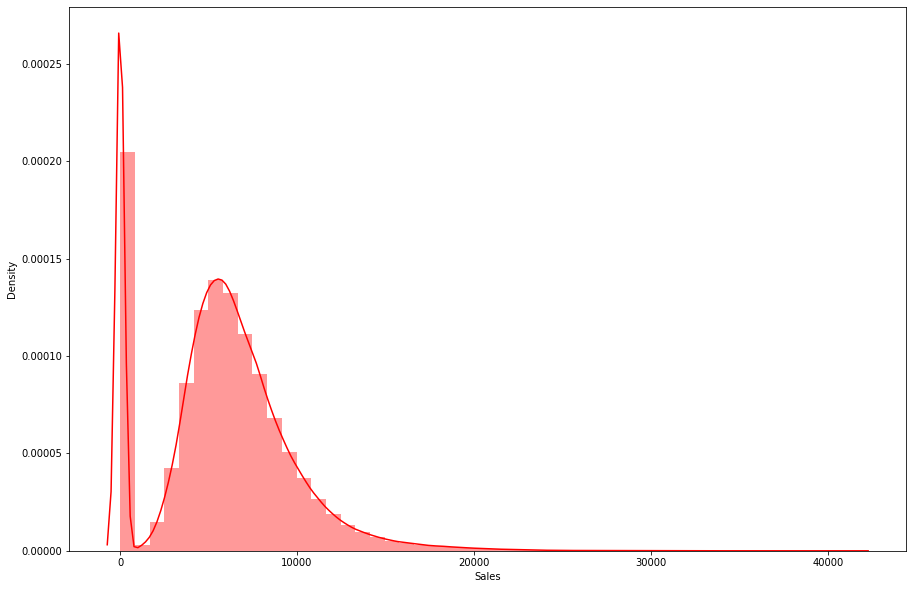

In [ ]:
# Dependent variable 'Sale'
plt.figure(figsize=(15,10))
sns.distplot(df1['Sales'],color="r")


In [ ]:
 df1.groupby('Store')['Sales'].sum()

Store
1        3716854
2        3883858
3        5408261
4        7556507
5        3642818
          ...   
1111     4091076
1112     7974294
1113     5196242
1114    16202585
1115     4922229
Name: Sales, Length: 1115, dtype: int64

In [ ]:
categorical_features = ['Open','Promo','StateHoliday','SchoolHoliday']

In [ ]:
df1.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

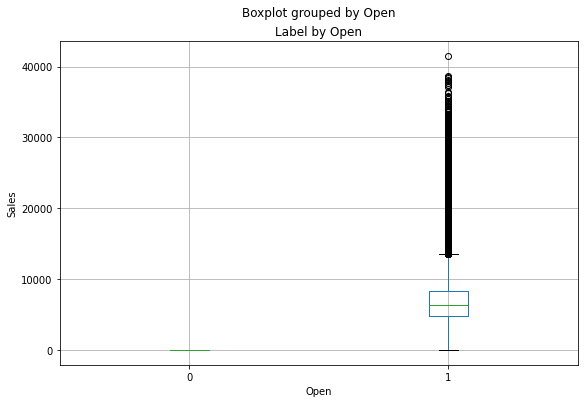

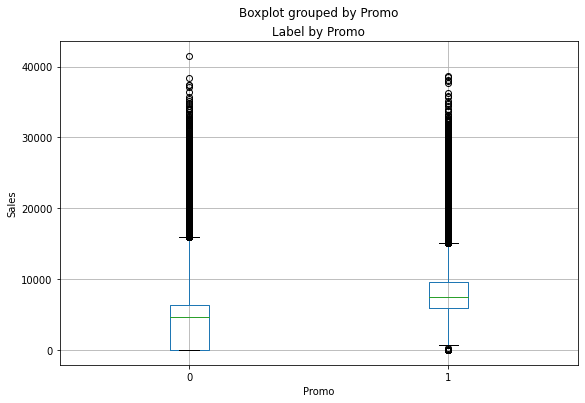

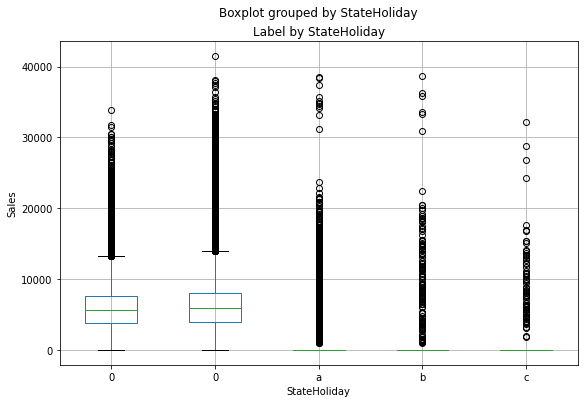

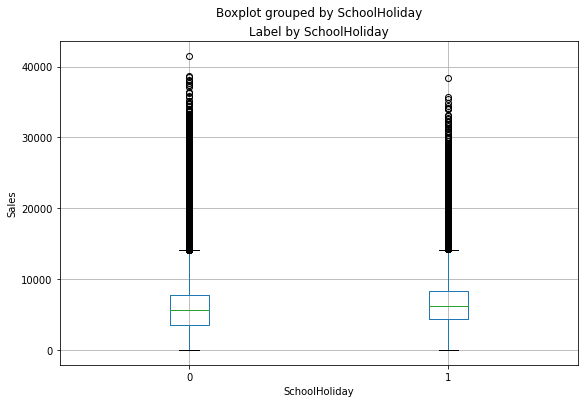

In [ ]:
# plot a boxplot for the label by each categorical feature  

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df1.boxplot(column = 'Sales', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Sales")
plt.show()

# Let's merge the two dataset

In [ ]:
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
df2.shape

(1115, 10)

In [ ]:
df3 = pd.merge(df1, df2, on = 'Store', how = 'left')

In [ ]:
df3

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
df3['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
df3[df3['PromoInterval'].isna()]['Promo2'].unique()  

array([0])

In [ ]:
df3[df3['Promo2SinceYear'].isna()]['Promo2'].unique()

array([0])

In [ ]:
df3[df3['Promo2SinceWeek'].isna()]['Promo2'].unique()

array([0])

# From the above analysis we see that null values in columns "Promo2SinceWeek", "Promo2SinceYear" and "PromoInterval" are coming because there is no continuation in Promo i.e Promo2 is 0. So, we can fill all null values in the above three columns with 0.

# In Promo2SinceWeek,Promo2SinceYear and PromoInterval columns, "NULL" is presented as one of the category. This should not be considered a missing value, but rather as “not applicable”. For example, if a value in “PromoInterval” is defined as “NULL” it means there is no promointerval as there is no continuation in Promo.

In [ ]:
df3['Promo2SinceWeek'].fillna(0,inplace = True)
df3['Promo2SinceYear'].fillna(0,inplace = True)
df3['PromoInterval'].fillna(0,inplace = True)

In [ ]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df2[df2['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
df3['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [ ]:
X = df3.drop(['Sales'],axis =1)
y = df3['Sales']

In [ ]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


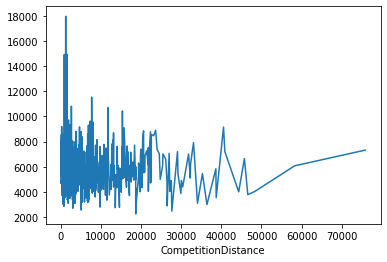

In [ ]:
df3.groupby('CompetitionDistance')['Sales'].mean().plot()

# Lets first look for null values 

In [ ]:
df3.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
dtype: int64

# Lets see for any patterns in null values

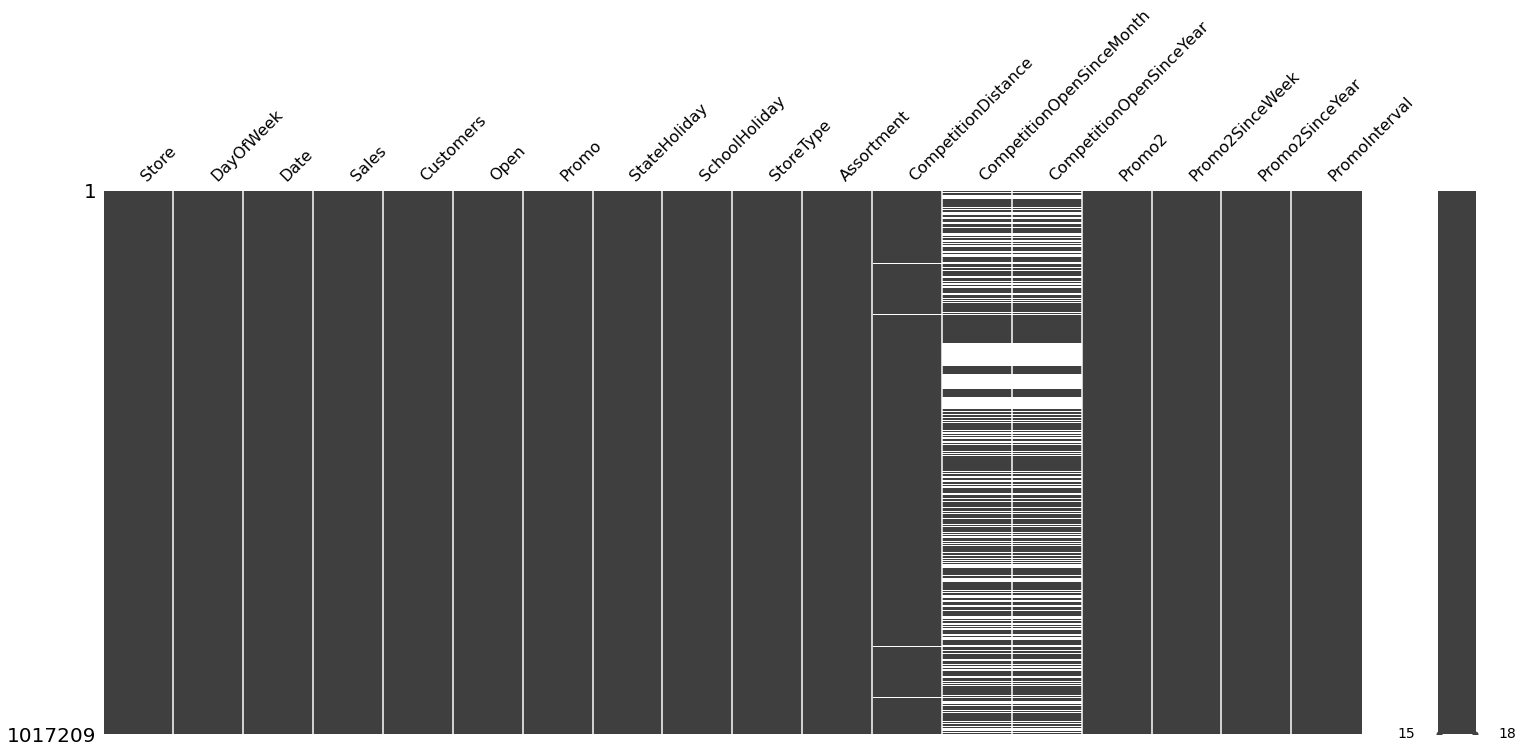

In [ ]:
import missingno as msno
msno.matrix(df3)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
df3[df3['CompetitionDistance'].isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,0.0,0.0,0
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,622,3,2013-01-02,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,0.0,0.0,0
1015858,879,3,2013-01-02,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1016385,291,2,2013-01-01,0,0,0,0,a,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
1016716,622,2,2013-01-01,0,0,0,0,a,1,a,c,NaN,NaN,NaN,0,0.0,0.0,0


In [ ]:
df3[df3['Store']==291]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
2520,291,3,2015-07-29,8204,814,1,1,0,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
3635,291,2,2015-07-28,10374,943,1,1,0,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
4750,291,1,2015-07-27,11692,1086,1,1,0,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011925,291,6,2013-01-05,5316,552,1,0,0,0,d,a,NaN,NaN,NaN,0,0.0,0.0,0
1013040,291,5,2013-01-04,7687,920,1,0,0,0,d,a,NaN,NaN,NaN,0,0.0,0.0,0
1014155,291,4,2013-01-03,7285,871,1,0,0,0,d,a,NaN,NaN,NaN,0,0.0,0.0,0
1015270,291,3,2013-01-02,7658,876,1,0,0,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0


In [ ]:
dataset = df3.copy()

# We can impute null values in the "CompetitionDistance" column with its mean value based on the type of store.

In [ ]:
dataset['CompetitionDistance'] = dataset['CompetitionDistance'].fillna(dataset.groupby('StoreType')['CompetitionDistance'].transform('mean'))

In [ ]:
dataset['CompetitionDistance'].isnull().sum()

0

# For "CompetitonOpenSinceMonth" and "CompetitionOpenSinceYear" columns we can impute null values with its mode based on the type of store.

In [ ]:
def fast_mode(df, key_cols, value_col):
    """ 
    Calculate a column mode, by group, ignoring null values. 

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame over which to calcualate the mode. 
    key_cols : list of str
        Columns to groupby for calculation of mode.
    value_col : str
        Column for which to calculate the mode. 

    Return
    ------ 
    pandas.DataFrame
        One row for the mode of value_col per key_cols group. If ties, 
        returns the one which is sorted first. 
    """
    return (df.groupby(key_cols + [value_col]).size() 
              .to_frame('counts').reset_index() 
              .sort_values('counts', ascending=False) 
              .drop_duplicates(subset=key_cols)).drop(columns='counts')

In [ ]:
dataset.loc[dataset.CompetitionOpenSinceMonth.isnull(), 'CompetitionOpenSinceMonth'] = dataset.StoreType.map(fast_mode(dataset, ['StoreType'], 'CompetitionOpenSinceMonth').set_index('StoreType').CompetitionOpenSinceMonth)

In [ ]:
dataset.loc[dataset.CompetitionOpenSinceYear.isnull(), 'CompetitionOpenSinceYear'] = dataset.StoreType.map(fast_mode(dataset, ['StoreType'], 'CompetitionOpenSinceYear').set_index('StoreType').CompetitionOpenSinceYear)

In [ ]:
dataset.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


# Now we have a clean dataset

# Let's begin with some EDA

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


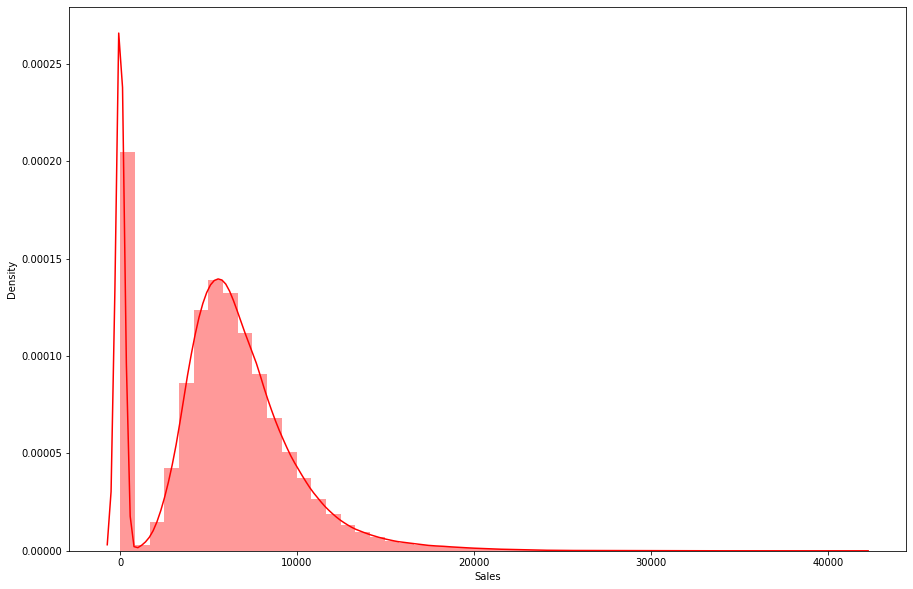

In [ ]:
# Dependent variable 'Sale'
plt.figure(figsize=(15,10))
sns.distplot(dataset['Sales'],color="r")

In [ ]:
categorical_features = ['Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment', 'Promo2']

In [ ]:
dataset.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
Year                           int64
Month                          int64
Month_Name                    object
dtype: object

In [ ]:
dataset['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
dataset['StateHoliday']= dataset['StateHoliday'].replace(0,'0')

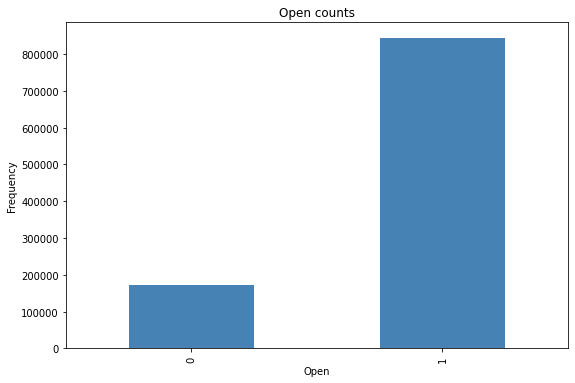

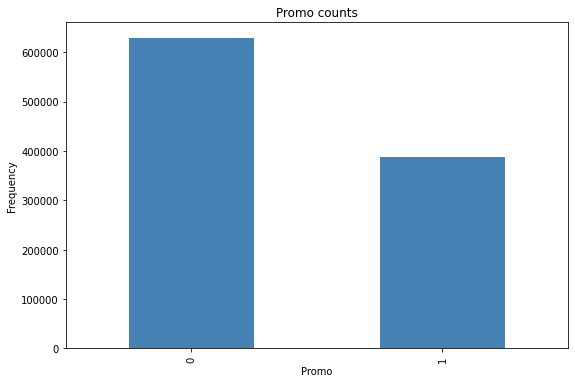

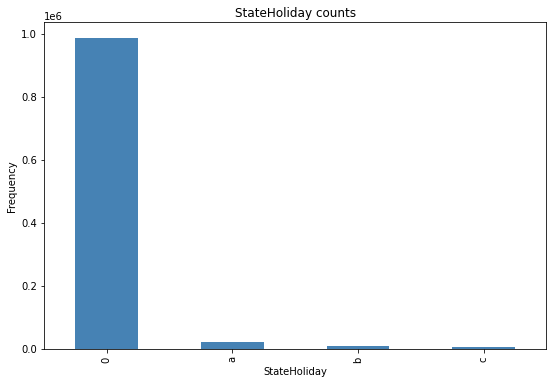

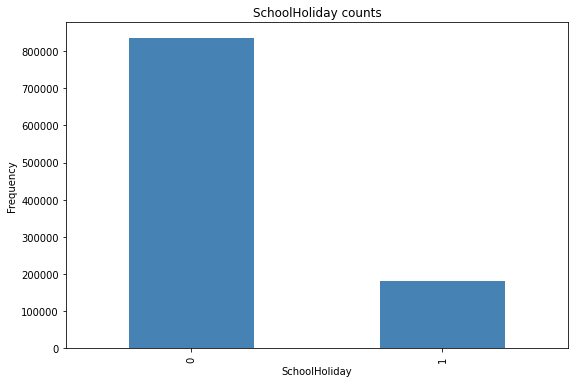

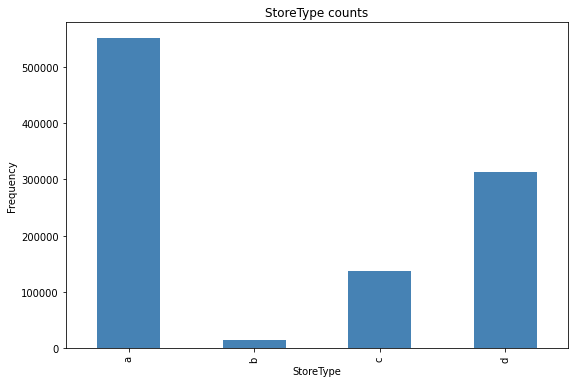

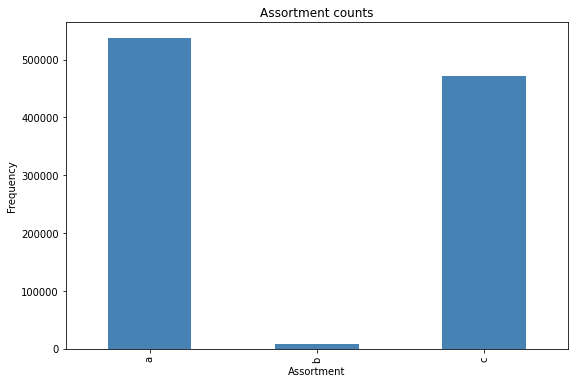

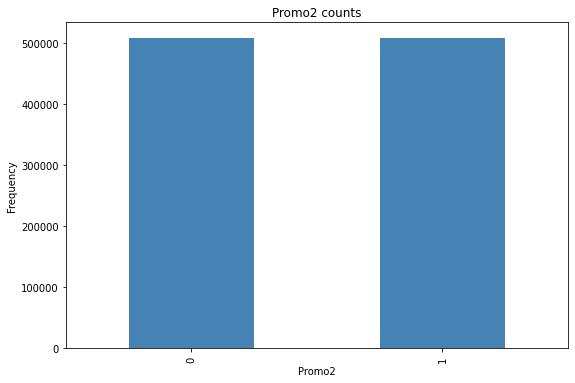

In [ ]:
# Count of each categorical feature
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

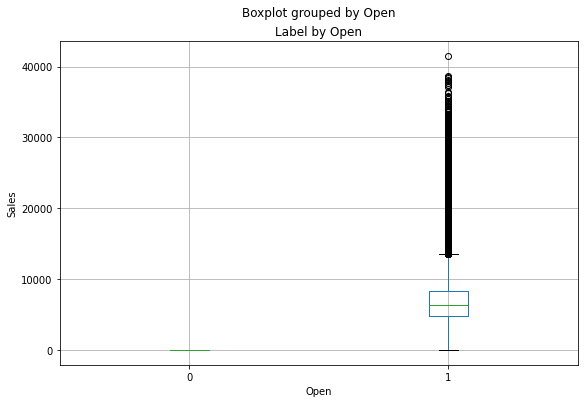

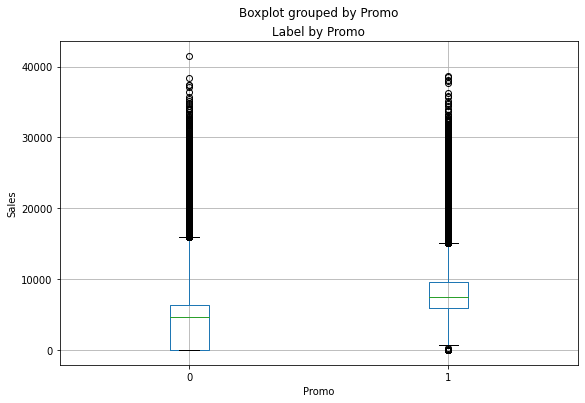

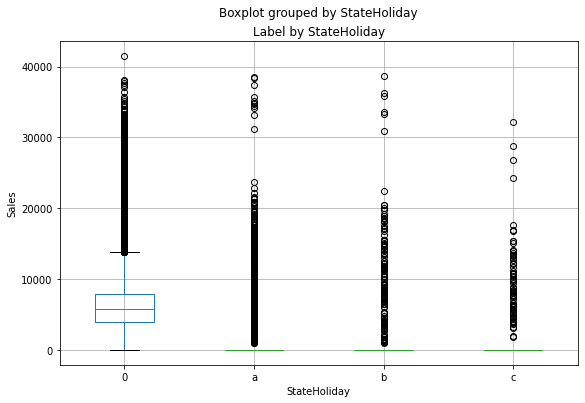

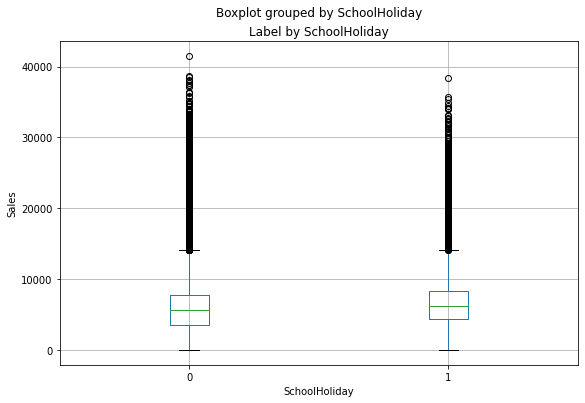

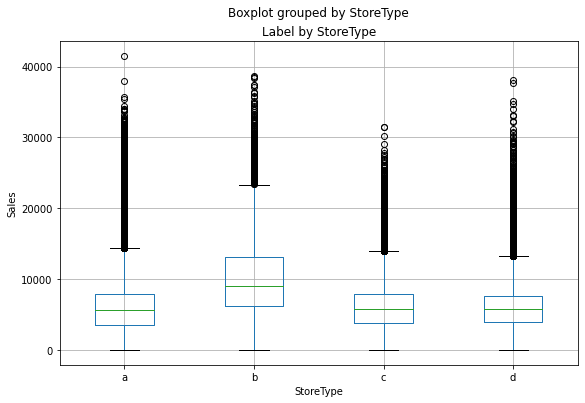

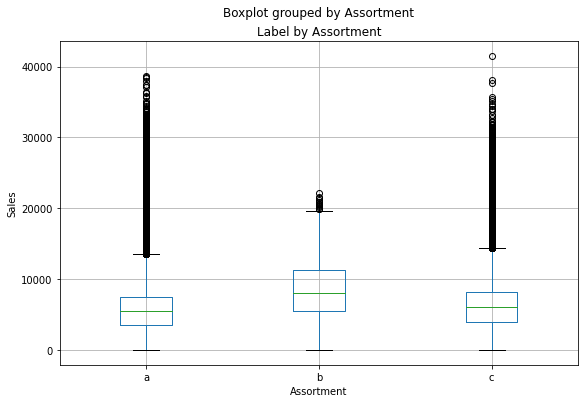

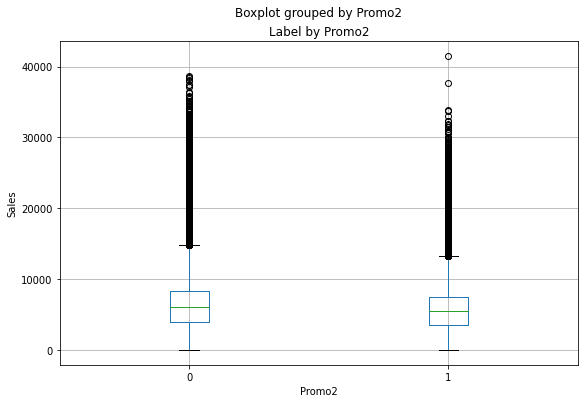

In [ ]:
# plot a boxplot for the label by each categorical feature  

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Sales', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Sales")
plt.show()

In [ ]:
dataset.groupby('Date')['Sales'].sum()

Date
2013-01    180132207
2013-02    171534275
2013-03    201180369
2013-04    183431432
2013-05    185411063
2013-06    180702351
2013-07    208843882
2013-08    198042727
2013-09    178053963
2013-10    187662330
2013-11    196170924
2013-12    231710561
2014-01    187752787
2014-02    178924677
2014-03    193019854
2014-04    194544977
2014-05    194693257
2014-06    190047051
2014-07    173892707
2014-08    163748475
2014-09    164516168
2014-10    164216398
2014-11    173327953
2014-12    202120592
2015-01    198843730
2015-02    178275458
2015-03    205631683
2015-04    197918886
2015-05    189143897
2015-06    207363373
2015-07    212322616
Name: Sales, dtype: int64

In [ ]:
dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Month_Name'], dtype='object')

In [ ]:
numerical_features = ['Customers','CompetitionDistance']

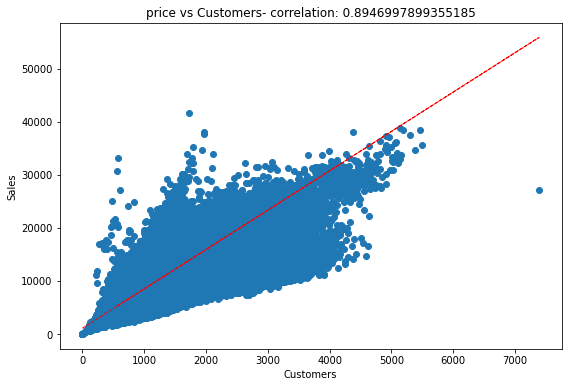

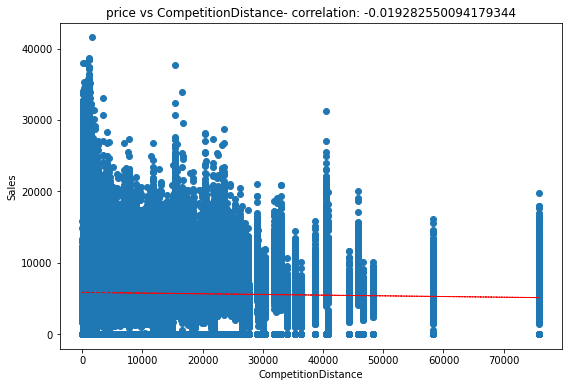

In [ ]:
  for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Sales'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

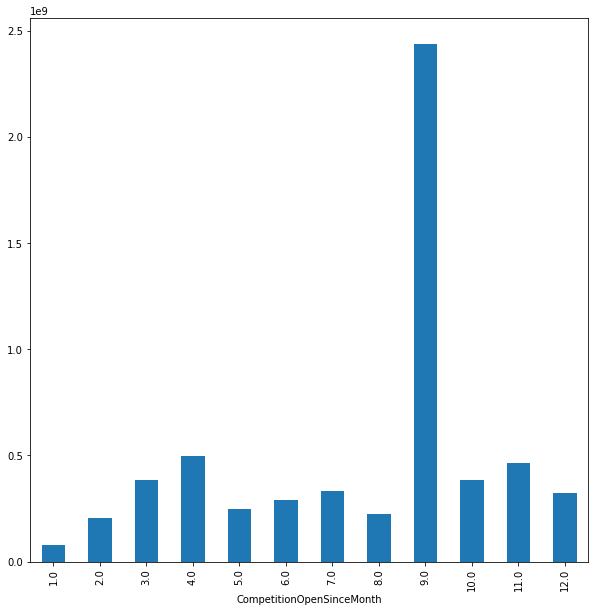

In [ ]:
plt.figure(figsize=(10,10))
ax = dataset.groupby('CompetitionOpenSinceMonth')['Sales'].sum()
ax.plot(kind = 'bar')
ax.set_xlabel = "k"

In [ ]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Month_Name
0,1,5,2015-07,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,Jul
1,2,5,2015-07,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,Jul
2,3,5,2015-07,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,Jul
3,4,5,2015-07,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,Jul
4,5,5,2015-07,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,Jul


# Here we see an anomaly!
# There are few observations in which we see that the shop is open but there is no Sale and we should drop those observation.

In [ ]:
dataset[dataset['Open'] == 1][dataset['Sales']==0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Month_Name


In [ ]:
Anomaly_Subset = dataset[dataset['Open'] == 1][dataset['Sales']==0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
dataset = dataset.drop(Anomaly_Subset.index)

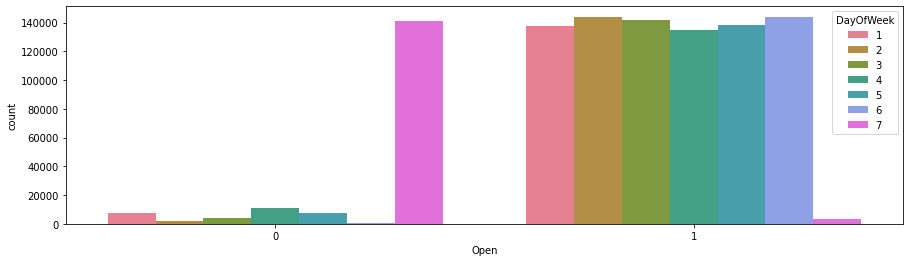

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=dataset,palette="husl", ax=axis1)


# Feature Engineering

In [ ]:
import datetime

In [ ]:
# Create Year and Month columns
dataset['Year']  = dataset['Date'].apply(lambda x: int(str(x)[:4]))
dataset['Month'] = dataset['Date'].apply(lambda x: int(str(x)[5:7]))

In [ ]:
# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
dataset['Date'] = dataset['Date'].apply(lambda x: (str(x)[:7]))

In [ ]:
dataset['Month_Name'] = dataset['Month'].apply(lambda x: datetime.date(1900, x, 1).strftime('%b'))

In [ ]:
def checkpromomonth(row):
 if row['PromoInterval'] != 0:
  if (row['Month_Name'] in row['PromoInterval']) :
      return 1
  else:
      return 0
 else:
   return 0

In [ ]:
dataset['PromoInterval']

0                         0
1           Jan,Apr,Jul,Oct
2           Jan,Apr,Jul,Oct
3                         0
4                         0
                 ...       
1017204     Jan,Apr,Jul,Oct
1017205                   0
1017206                   0
1017207                   0
1017208    Mar,Jun,Sept,Dec
Name: PromoInterval, Length: 1017155, dtype: object

In [ ]:
dataset['IsPromoMonth'] =  dataset.apply(lambda row: checkpromomonth(row) ,axis=1)

In [ ]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Month_Name,IsPromoMonth
0,1,5,2015-07,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,Jul,0
1,2,5,2015-07,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,Jul,1
2,3,5,2015-07,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,Jul,1
3,4,5,2015-07,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,Jul,0
4,5,5,2015-07,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,Jul,0


In [ ]:
dataset.drop(['Date','Month_Name'],axis =1 , inplace = True)

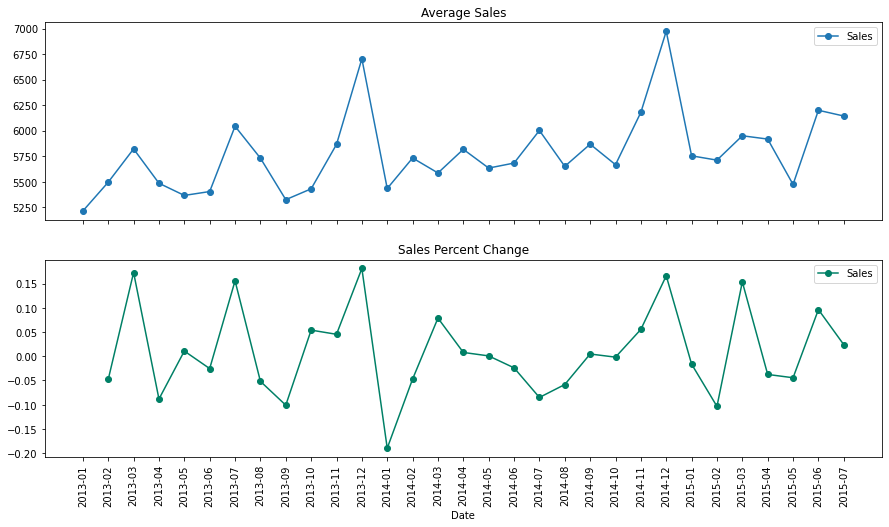

In [ ]:
# group by date and get average sales, and precent change
average_sales    = dataset.groupby('Date')["Sales"].mean()
pct_change_sales = dataset.groupby('Date')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

# Data Preprocessing

In [ ]:
dataset_pr = dataset.copy()

In [ ]:
dataset_pr.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,IsPromoMonth
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,0
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,1
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,1
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,0
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,0


In [ ]:
dataset_pr.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [ ]:
dataset_pr.SchoolHoliday.unique()

array([1, 0])

In [ ]:
dataset_pr.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
dataset_pr.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

In [ ]:
dataset_pr = pd.get_dummies(dataset_pr,columns=['StateHoliday','StoreType','Assortment'], prefix = ['StateHoliday','StoreType','Assortment'], drop_first = True )

In [ ]:
dataset_pr.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,IsPromoMonth,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,0,0,0,0,0,1,0,0,0
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,1,0,0,0,0,0,0,0,0
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,1,0,0,0,0,0,0,0,0
3,4,5,13995,1498,1,1,1,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,0,0,0,0,0,1,0,0,1
4,5,5,4822,559,1,1,1,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,0,0,0,0,0,0,0,0,0


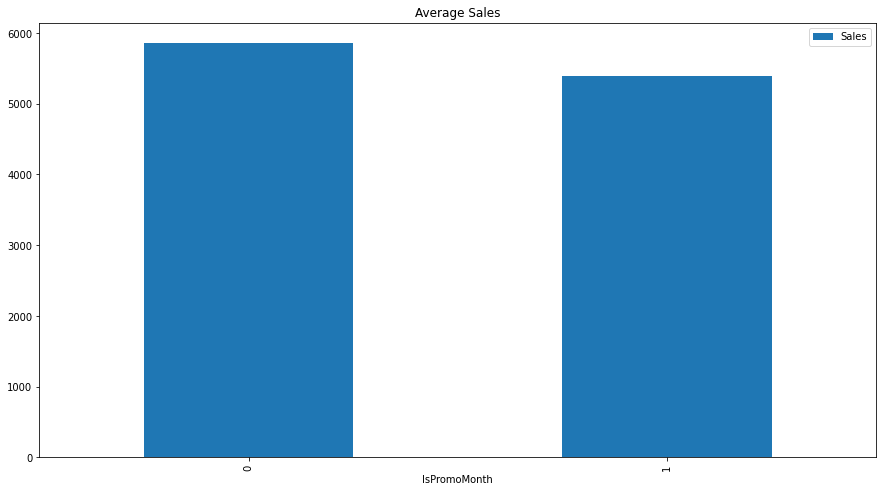

In [ ]:
average_sales = dataset.groupby('IsPromoMonth')["Sales"].mean()
fig, axis1 = plt.subplots(1,1,sharex=True,figsize=(15,8))

ax1 = average_sales.plot(legend=True,ax=axis1,title="Average Sales", kind = 'bar')

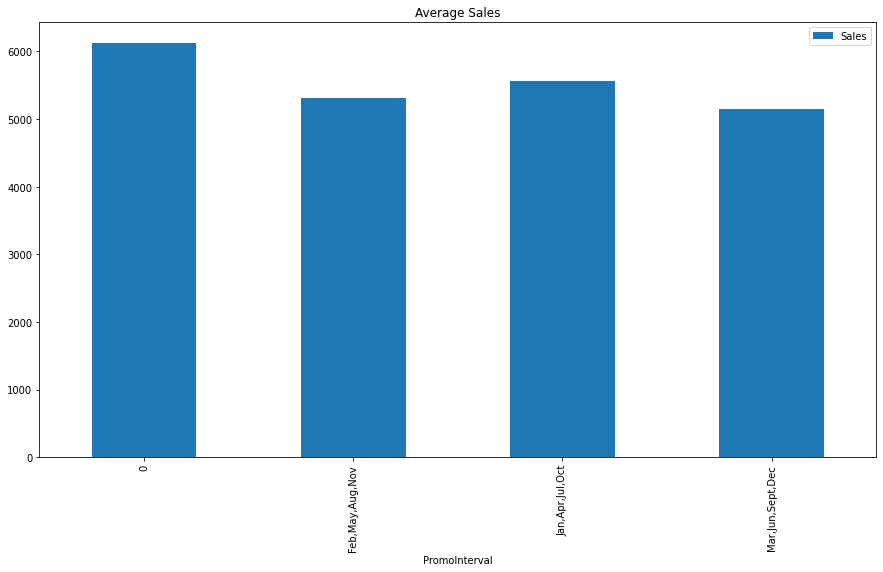

In [ ]:
average_sales = dataset.groupby('PromoInterval')["Sales"].mean()
fig, axis1 = plt.subplots(1,1,sharex=True,figsize=(15,8))

ax1 = average_sales.plot(legend=True,ax=axis1,title="Average Sales", kind = 'bar')

In [ ]:
dataset_pr = pd.get_dummies(dataset_pr,columns=['PromoInterval'], prefix = ['PromoInterval'], drop_first = True )

In [ ]:
dataset_pr.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,IsPromoMonth,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,0,0,0,0,0,1,0,0,0,0,0,0
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,1,0,0,0,0,0,0,0,0,0,1,0
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,2015,7,1,0,0,0,0,0,0,0,0,0,1,0
3,4,5,13995,1498,1,1,1,620.0,9.0,2009.0,0,0.0,0.0,2015,7,0,0,0,0,0,1,0,0,1,0,0,0
4,5,5,4822,559,1,1,1,29910.0,4.0,2015.0,0,0.0,0.0,2015,7,0,0,0,0,0,0,0,0,0,0,0,0


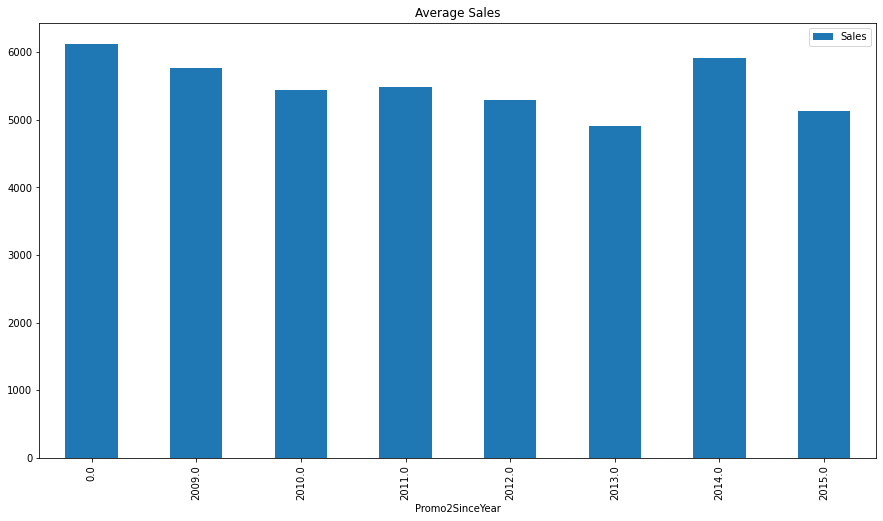

In [ ]:
average_sales = dataset.groupby('Promo2SinceYear')["Sales"].mean()
fig, axis1 = plt.subplots(1,1,sharex=True,figsize=(15,8))

ax1 = average_sales.plot(legend=True,ax=axis1,title="Average Sales", kind = 'bar')

In [ ]:
dataset_pr.shape

(1017155, 27)

In [ ]:
dataset_pr.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,IsPromoMonth,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,0,0.0,0.0,2015,7,0,0,0,0,0,1,0,0,0,0,0,0
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,1,13.0,2010.0,2015,7,1,0,0,0,0,0,0,0,0,0,1,0
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,2015,7,1,0,0,0,0,0,0,0,0,0,1,0
3,4,5,13995,1498,1,1,1,620.0,9.0,2009.0,0,0.0,0.0,2015,7,0,0,0,0,0,1,0,0,1,0,0,0
4,5,5,4822,559,1,1,1,29910.0,4.0,2015.0,0,0.0,0.0,2015,7,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = dataset_pr.drop(['Sales'],axis = 1)
y = dataset_pr['Sales']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X.shape

(1017155, 26)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.4, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(610293, 26)
(406862, 26)


# Implementing Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_pred_train_l = lasso.predict(X_train)
y_pred_test_l = lasso.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_test_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_test_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_test_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1470586.7699043055
RMSE : 1212.6775209858165
R2 : 0.9005879896656646
Adjusted R2 :  0.90058163644564


In [ ]:
 from sklearn.model_selection import cross_validate

In [ ]:
cv_results = cross_validate(lasso, X, y, cv=3, scoring = 'r2')

In [ ]:
cv_results

{'fit_time': array([21.94665122, 22.25601292, 21.02406979]),
 'score_time': array([0.05489969, 0.03217244, 0.04542732]),
 'test_score': array([0.89889513, 0.90045478, 0.89750778])}

# Implementing SVM

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')

svr.fit(X_train,y_train)